<a href="https://colab.research.google.com/github/SnehaPrasanna1/ML-LAB-/blob/main/Lab_2_1BM22CS284.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
df=pd.read_csv("/content/WeatherDataset.csv")
df.head()

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [10]:
final_df=df.drop(['Day','Decision'],axis=1)
final_df.head()

,Outlook,Temp,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [15]:
import math
def calculate_entropy(final_df, target_column):
    total_rows = len(final_df)
    target_values = df[target_column].unique()  # Corrected from 'data' to 'df'

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(df[df[target_column] == value])  # Used df instead of final_df
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion)

    return entropy

# Calculate entropy for the 'Decision' column
entropy_decision = calculate_entropy(df, 'Decision')
print(f"Entropy of the dataset: {entropy_decision}")

Entropy of the dataset: 0.9402859586706311


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math

# Load dataset
df = pd.read_csv("/content/WeatherDataset.csv")

# Drop 'Day' column since it's not a relevant feature
final_df = df.drop(['Day'], axis=1)

def calculate_entropy(data, target_column):
    """Calculate entropy for a categorical target variable."""
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy

def calculate_information_gain(data, feature, target_column):
    """Calculate information gain for a feature with respect to the target variable."""

    # Calculate entropy of the entire dataset (before the split)
    entropy_before_split = calculate_entropy(data, target_column)

    # Calculate weighted average entropy for the feature
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    # Calculate information gain
    information_gain = entropy_before_split - weighted_entropy

    return information_gain

# Calculate entropy for the 'Decision' column
entropy_decision = calculate_entropy(df, 'Decision')
print(f"Entropy of the dataset: {entropy_decision}")

# Calculate information gain for each feature
features = ['Outlook', 'Temp', 'Humidity', 'Wind']
info_gain = {feature: calculate_information_gain(df, feature, 'Decision') for feature in features}

print("\nInformation Gain for each feature:")
for feature, ig in info_gain.items():
    print(f"{feature}: {ig}")


Entropy of the dataset: 0.9402859586706311

Information Gain for each feature:
Outlook: 0.24674981977443933
Temp: 0.02922256565895487
Humidity: 0.15183550136234159
Wind: 0.04812703040826949


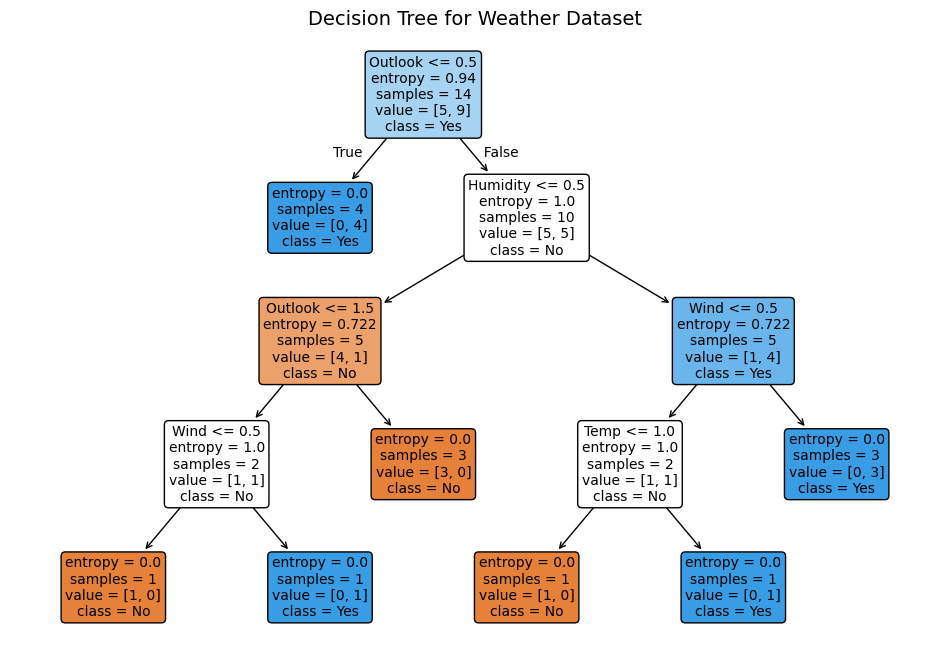

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/WeatherDataset.csv")

# Drop 'Day' column since it's irrelevant for decision-making
df = df.drop(['Day'], axis=1)

# Encode categorical variables into numerical values
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for later decoding

# Features (X) and Target (y)
X = df.drop(columns=['Decision'])  # Features
y = df['Decision']  # Target variable

# Create a decision tree with more iterations (increased depth)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)  # Increased depth
clf.fit(X, y)

# Get class labels from the encoder
class_names = label_encoders['Decision'].classes_
feature_names = X.columns  # Use all feature names

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Weather Dataset", fontsize=14)
plt.show()



In [22]:
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/WeatherDataset.csv")

# Drop 'Day' column since it's irrelevant for decision-making
df = df.drop(['Day'], axis=1)

# Encode categorical variables into numerical values
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for later decoding

# Function to calculate entropy
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy

# Function to calculate information gain
def calculate_information_gain(data, feature, target_column):
    total_entropy = calculate_entropy(data, target_column)

    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    information_gain = total_entropy - weighted_entropy
    return information_gain

# ID3 Algorithm
def id3(data, target_column, features):
    # If all instances have the same target value, return that value
    if len(data[target_column].unique()) == 1:
        return data[target_column].iloc[0]

    # If there are no remaining features, return the most common target value
    if len(features) == 0:
        return data[target_column].mode().iloc[0]

    # Select the best feature based on information gain
    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

    # Create a dictionary to store the decision tree
    tree = {best_feature: {}}

    # Remove the best feature from the remaining features
    features = [f for f in features if f != best_feature]

    # Iterate over each unique value of the best feature and create subtrees
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, target_column, features)

    return tree

# Define features and target column
features = list(df.columns)
features.remove('Decision')  # Remove target column from feature list
target_column = 'Decision'

# Train the ID3 Decision Tree
decision_tree = id3(df, target_column, features)

# Print the decision tree
import pprint
pprint.pprint(decision_tree)


{'Outlook': {0: 1, 1: {'Wind': {0: 0, 1: 1}}, 2: {'Humidity': {0: 0, 1: 1}}}}
